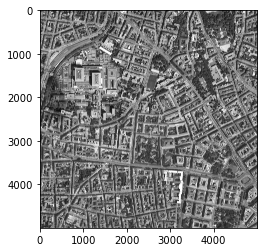

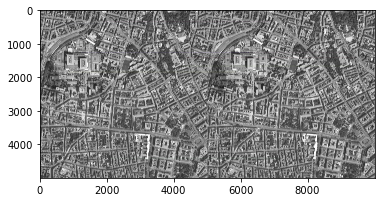

(<matplotlib.image.AxesImage at 0x7fedab312910>, None)

In [1]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#reading image
query_path = "/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/images/vienna9.tif"
img1 = cv2.imread(query_path, cv2.IMREAD_GRAYSCALE)
comp_path = "/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/images/vienna9.tif"
img2 = cv2.imread(comp_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap = 'gray')
plt.show()

# intitiate the orb detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()


TypeError: Image data of dtype object cannot be converted to float

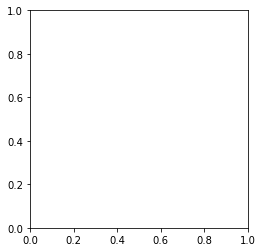

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#reading image
# query_path = "/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/gt/austin1.tif"
query_path = "/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/images/chicago34.tif"
img1 = cv.imread(query_path, cv.IMREAD_GRAYSCALE)
comp_path = "/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/images/chicago34.tif"
img2 = cv.imread(comp_path, cv.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap = 'gray')
plt.show()
plt.imshow(img2, cmap = 'gray')
plt.show()

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
print(type(flann))
matches = flann.knnMatch(des1,des2,k=2)

total = len(matches)
match = 0

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        match += 1

print(match)
print(total)

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3),plt.show()
plt.imsave('chicago_same.png', img3)

In [47]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import time

def compare_two(path_a, path_b):
    '''this method returns a 'percent match' statistic for two images through
    feature matching, given the path to each image. the images compared can be
    rotationally and/or scale variant, as this method is implemented through SIFT.'''

    # reads in the two images
    img1 = cv.imread(path_a, cv.IMREAD_GRAYSCALE)
    img2 = cv.imread(path_b, cv.IMREAD_GRAYSCALE)

    # shows the two images that are read in
    plt.imshow(img1, cmap = 'gray')
    plt.show()
    plt.imshow(img2, cmap = 'gray')
    plt.show()

    # initiates the SIFT detector
    sift = cv.SIFT_create()

    # finds the keypoints and descriptors
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)   # or pass empty dictionary
    flann = cv.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)

    # for use in determining the final test statistic
    total = len(matches)
    match = 0

    # need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]

    # ratio test as per Lowe's paper, set at 0.7 - this rejects almost all false
    # matches while losing only a minimal percentage of true matches
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            matchesMask[i]=[1,0]
            match += 1

    # sets parameters and draws an image representation of the feature matches 
    # between the two images
    draw_params = dict(matchColor = (0,255,0),
                    singlePointColor = (255,0,0),
                    matchesMask = matchesMask,
                    flags = cv.DrawMatchesFlags_DEFAULT)
    img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
    plt.imshow(img3),plt.show()
    
    # saves the new image in the current folder with a name corresponding to
    # the input images names and data about the final output match
    name1 = (path_a.split('/')[-1]).split('.')[0]
    name2 = (path_b.split('/')[-1]).split('.')[0]
    plt.imsave('{0}_{1}_{2}_{3}_{4}.png'.format(name1, name2, match, total, round(match/total, 4)), img3)
    
    # prints data about the strength  between the two images
    print('  - good matches:', match)
    print('  - total features:', total)
    print('  - percentage:', round(match/total, 4))
    
    # returns the match statistic to two decimal places
    return round(match/total, 2)

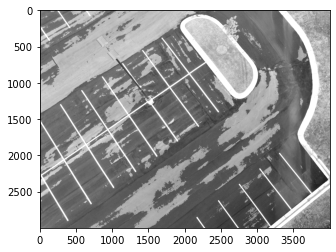

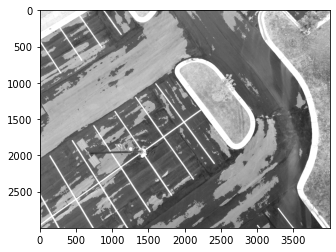

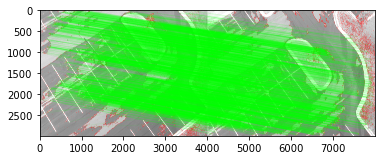

  - good matches: 5689
  - total features: 29843
  - percentage: 0.1906


0.19

In [48]:
g = "/Users/christinevankirk/Desktop/uav_nsf/Phantom_Photos_6-7-21/DJI_0060.JPG"
h = "/Users/christinevankirk/Desktop/uav_nsf/Phantom_Photos_6-7-21/DJI_0062.JPG"

compare_two(g, h)

In [10]:
import os

def get_ls(path):
    temp = os.getcwd()
    os.chdir(path)
    files = os.popen('ls')
    os.chdir(temp)
    files = list(filter(lambda s: s[-4:] == '.tif', map(lambda s: s.strip(), files)))
    return files

In [ ]:
    #plt.imsave('{0}_{1}.png'.format(name1, name2), img3)



In [26]:
# ** for small diverse subset, rotated images ** #

path = '/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix_gt/'
files = get_ls(path)

print(' ** for matching images, rotated ** ')
sum = 0
for x in files:
    print('for photo:', x)
    path_x = path + x
    sum += compare_two(path_x, path_x)
print('OVERALL AVG: ', round(sum/len(files), 2))

 ** for matching images, rotated ** 
for photo: austin14.tif
  - matches: 13668
  - total: 25461
  - percentage: 0.54
for photo: austin36.tif
  - matches: 10075
  - total: 17426
  - percentage: 0.58
for photo: chicago27.tif
  - matches: 8732
  - total: 14962
  - percentage: 0.58
for photo: chicago8.tif
  - matches: 16175
  - total: 26992
  - percentage: 0.6
for photo: kitsap4.tif
  - matches: 1513
  - total: 2709
  - percentage: 0.56
for photo: kitsap8.tif
  - matches: 1431
  - total: 2480
  - percentage: 0.58
for photo: tyrol-w30.tif
  - matches: 5477
  - total: 9296
  - percentage: 0.59
for photo: tyrol-w9.tif
  - matches: 1394
  - total: 2486
  - percentage: 0.56
for photo: vienna10.tif
  - matches: 15800
  - total: 26216
  - percentage: 0.6
for photo: vienna25.tif
  - matches: 6362
  - total: 11768
  - percentage: 0.54
for photo: vienna9.tif
  - matches: 16794
  - total: 29940
  - percentage: 0.56
OVERALL AVG:  0.57


In [ ]:
# ** for small diverse subset, DIFFERING images ** #

import os

path = '/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/gt/'
files = get_ls(path)

print(' ** for matching gt images, same orientation ** ')
sum = 0
for x in files:
    print('for photo:', x)
    path_x = path + x
    sum += compare_two(path_x, path_x)
print('OVERALL AVG: ', round(sum/len(files), 2))



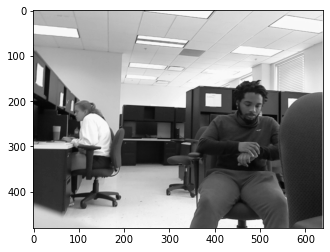

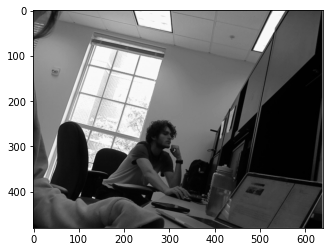

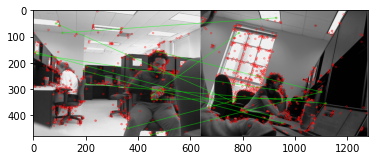

  - matches: 11
  - total: 651
  - percentage: 0.0169


0.02

In [30]:
compare_two('/Users/christinevankirk/Desktop/uav_nsf/feature_matching/a1.jpg', '/Users/christinevankirk/Desktop/uav_nsf/feature_matching/a2.jpg' )

In [31]:
import os

os.system('mv a1.jpg a2.jpg pi_ex_11_651_0.0169.png pi_examples/false2')

0

In [32]:
print('for chicago')
compare_two('/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix_gt/chicago8.tif', '/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix_gt/chicago27.tif')
print('for sfo')
compare_two('/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix_gt/kitsap4.tif', '/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix_gt/kitsap8.tif')
print('for tyrol')
compare_two('/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix_gt/tyrol-w9.tif', '/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix_gt/tyrol-w30.tif')
print('for vienna')
compare_two('/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix_gt/vienna9.tif', '/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix_gt/vienna10.tif')

for chicago
  - matches: 1956
  - total: 26992
  - percentage: 0.07
for sfo
  - matches: 368
  - total: 2709
  - percentage: 0.14
for tyrol
  - matches: 296
  - total: 2486
  - percentage: 0.12
for vienna
  - matches: 3135
  - total: 29940
  - percentage: 0.1


0.1

In [ ]:
print('for chicago')
compare_two('/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix/chicago8.tif', '/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix/chicago27.tif')
print('for sfo')
compare_two('/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix/sfo14.tif', '/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix/sfo34.tif')
print('for vienna')
compare_two('/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix/vienna9.tif', '/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/diverse_mix/vienna10.tif')

 ** for matching images, rotated 90, scaled 0.5 ** 
for photo: austin1.tif


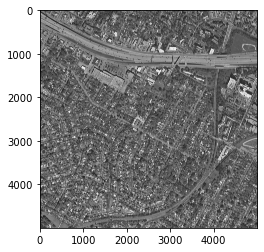

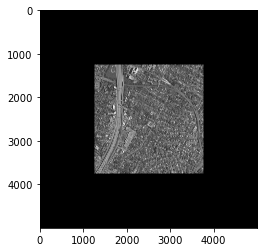

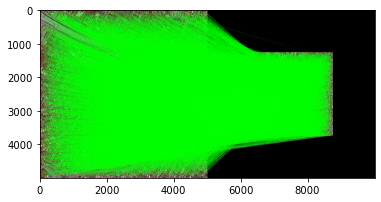

  - matches: 32500
  - total: 198855
  - percentage: 0.16
for photo: austin10.tif


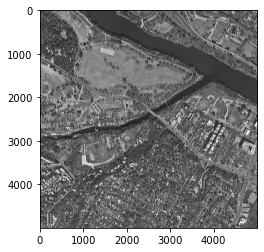

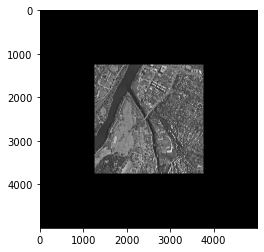

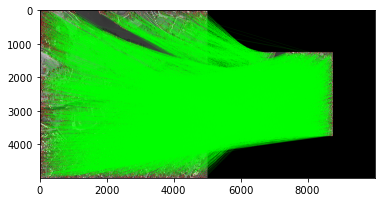

  - matches: 26002
  - total: 178439
  - percentage: 0.15
for photo: austin11.tif


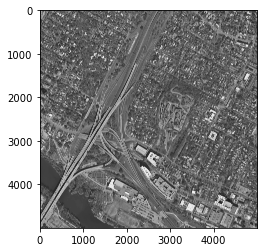

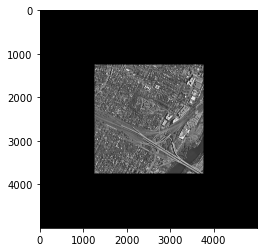

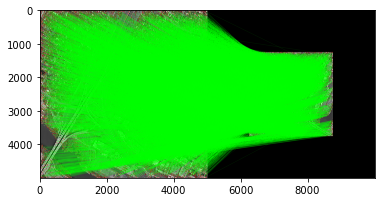

  - matches: 31234
  - total: 190980
  - percentage: 0.16
for photo: austin12.tif


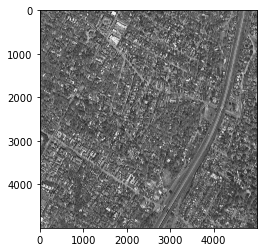

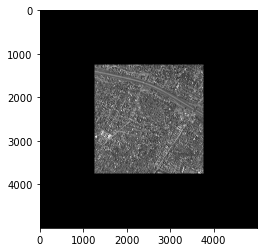

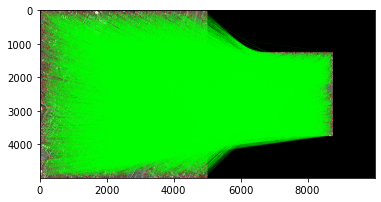

  - matches: 36277
  - total: 261758
  - percentage: 0.14
for photo: austin13.tif


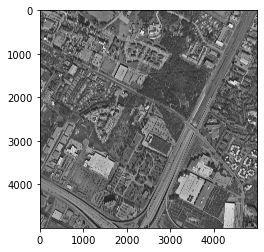

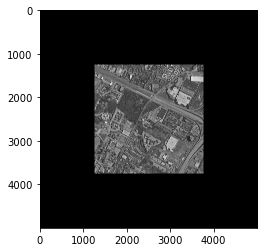

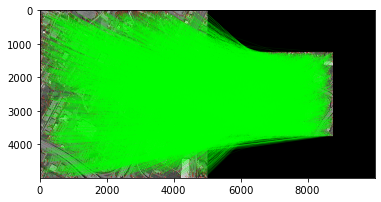

  - matches: 26816
  - total: 154855
  - percentage: 0.17
for photo: austin14.tif


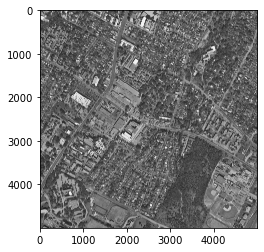

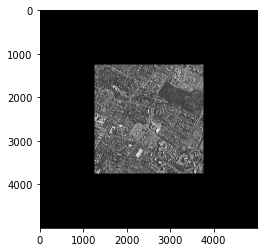

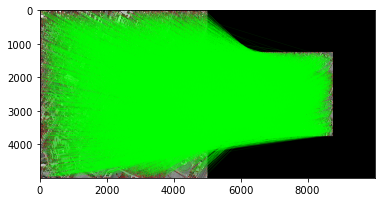

  - matches: 34068
  - total: 212020
  - percentage: 0.16
for photo: austin15.tif


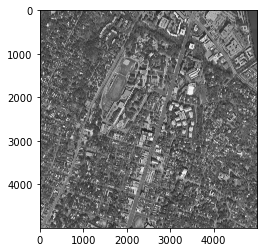

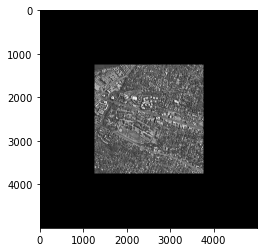

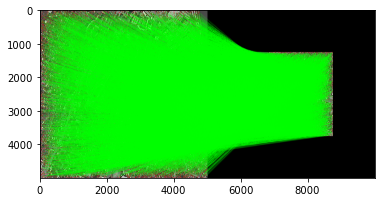

  - matches: 33220
  - total: 234036
  - percentage: 0.14
for photo: austin16.tif


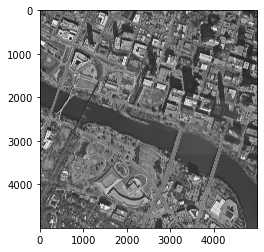

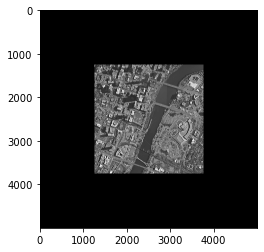

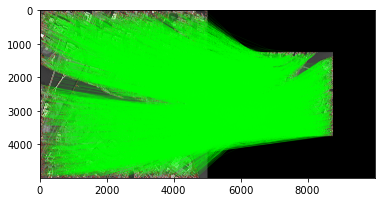

  - matches: 23213
  - total: 141865
  - percentage: 0.16
for photo: austin17.tif


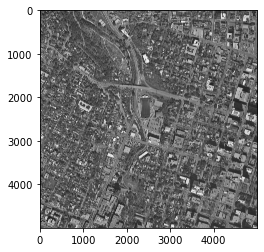

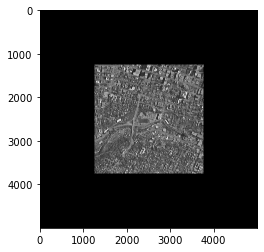

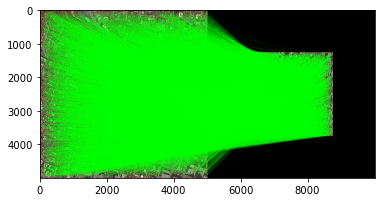

  - matches: 31916
  - total: 204531
  - percentage: 0.16
for photo: austin18.tif


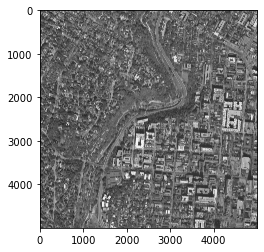

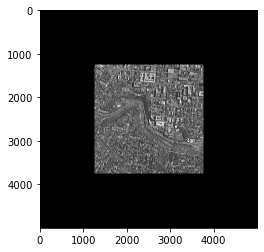

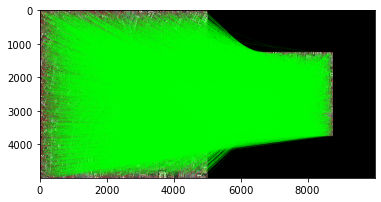

  - matches: 31342
  - total: 226911
  - percentage: 0.14
for photo: austin19.tif


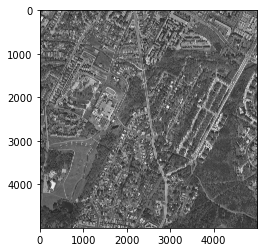

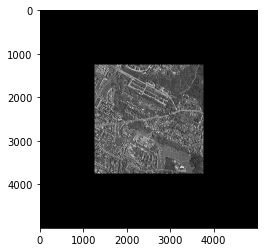

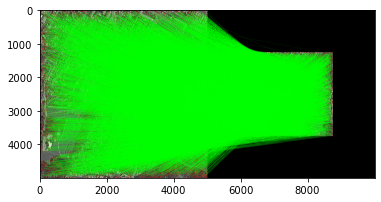

  - matches: 30777
  - total: 212267
  - percentage: 0.14
for photo: austin1_copy.tif


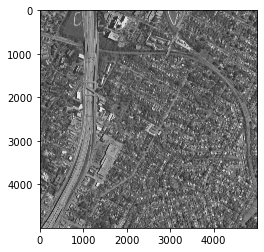

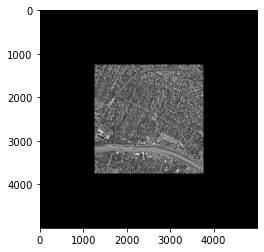

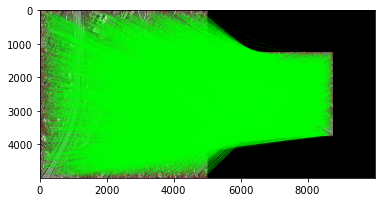

  - matches: 32605
  - total: 199113
  - percentage: 0.16
for photo: austin2.tif


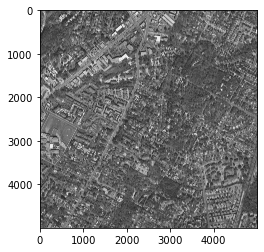

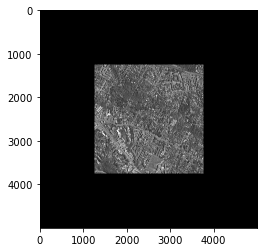

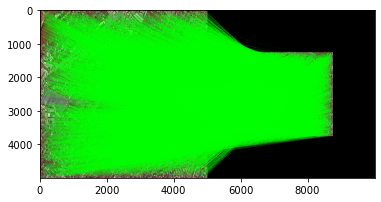

  - matches: 34522
  - total: 238701
  - percentage: 0.14
for photo: austin20.tif


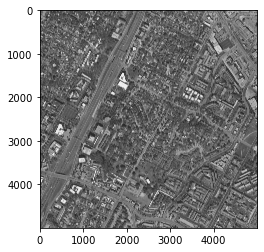

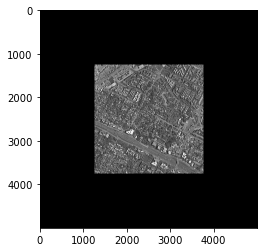

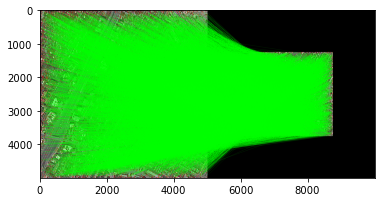

  - matches: 30362
  - total: 182167
  - percentage: 0.17
for photo: austin21.tif


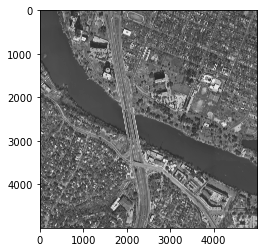

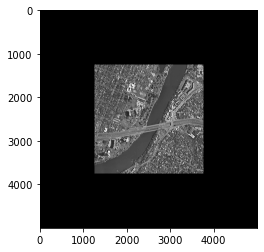

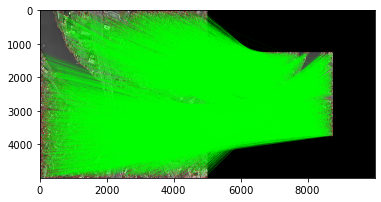

  - matches: 24931
  - total: 178973
  - percentage: 0.14
for photo: austin22.tif


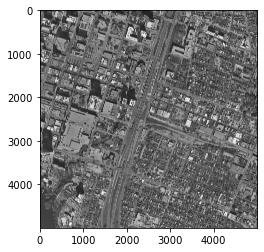

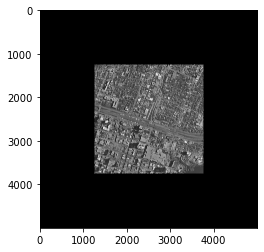

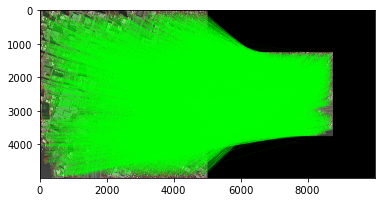

  - matches: 30092
  - total: 179819
  - percentage: 0.17
for photo: austin23.tif


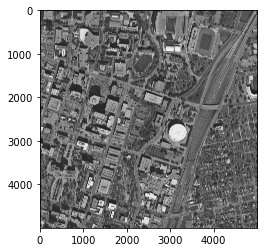

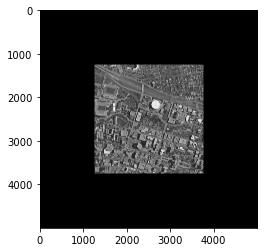

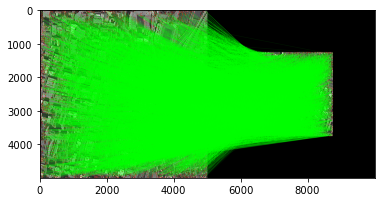

  - matches: 23109
  - total: 148197
  - percentage: 0.16
for photo: austin24.tif


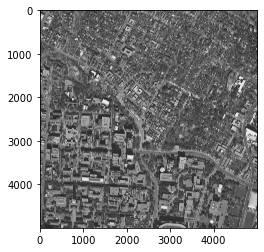

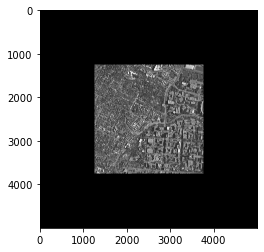

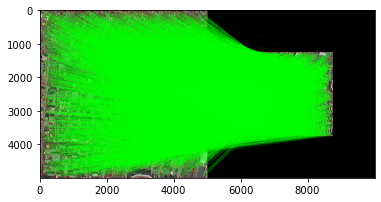

  - matches: 28821
  - total: 190297
  - percentage: 0.15
for photo: austin25.tif


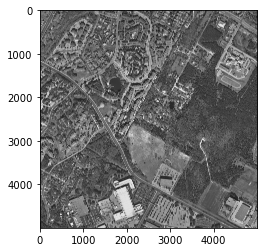

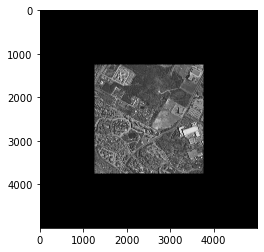

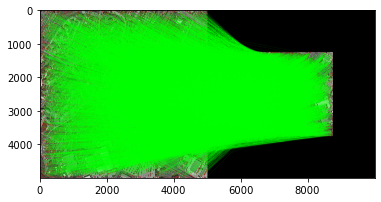

  - matches: 30336
  - total: 227134
  - percentage: 0.13
for photo: austin26.tif


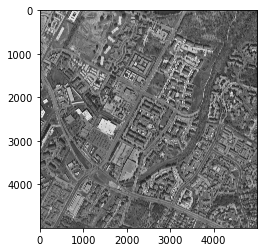

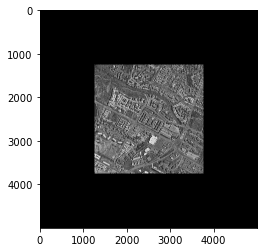

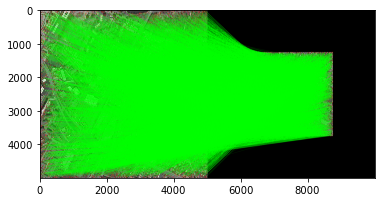

  - matches: 30228
  - total: 171778
  - percentage: 0.18
for photo: austin27.tif


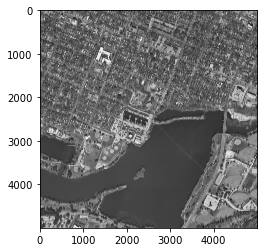

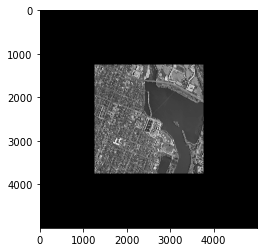

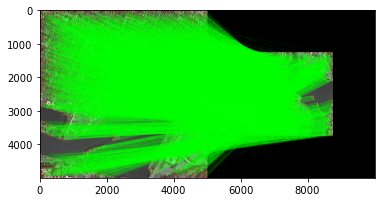

  - matches: 23934
  - total: 153156
  - percentage: 0.16
for photo: austin28.tif


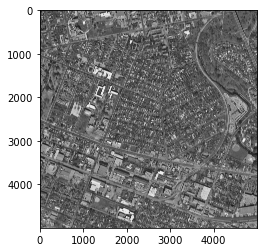

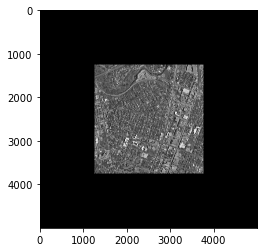

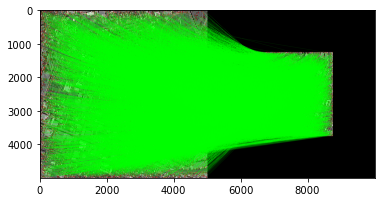

  - matches: 30761
  - total: 185580
  - percentage: 0.17
for photo: austin29.tif


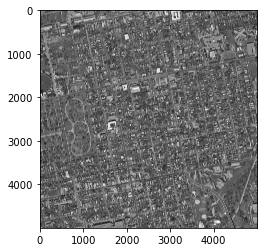

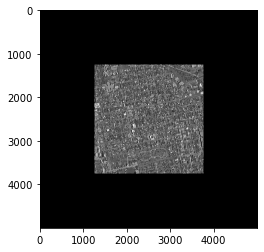

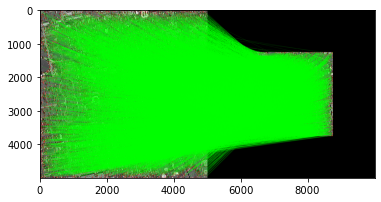

  - matches: 28180
  - total: 180180
  - percentage: 0.16
for photo: austin3.tif


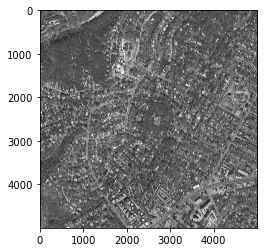

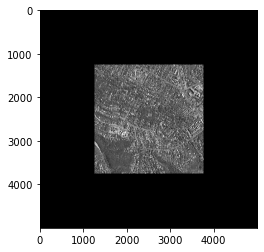

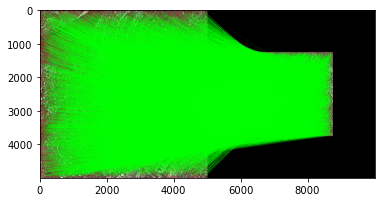

  - matches: 34388
  - total: 266843
  - percentage: 0.13
for photo: austin30.tif


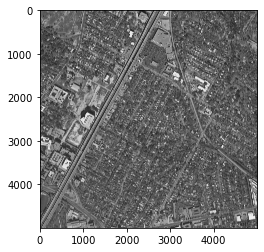

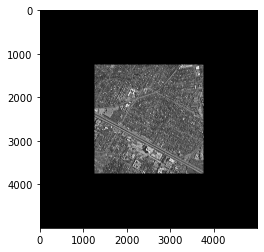

KeyboardInterrupt: 

In [4]:
import os

path = '/Volumes/AC_BACKUP/aerial_dataset/AerialImageDataset/train/images/'
files = get_ls(path)

print(' ** for matching images, rotated 90, scaled 0.5 ** ')
sum = 0
for x in files:
    print('for photo:', x)
    path_x = path + x
    sum += compare_two(path_x, path_x)
print('OVERALL AVG: ', round(sum/len(files), 2))

 ** for matching gt images, same orientation ** 
for photo: austin1.tif
  - matches: 25167
  - total: 27258
  - percentage: 0.92

for photo: austin10.tif
  - matches: 11819
  - total: 12612
  - percentage: 0.94

for photo: austin11.tif
  - matches: 22477
  - total: 24142
  - percentage: 0.93

for photo: austin12.tif
  - matches: 31062
  - total: 34033
  - percentage: 0.91

for photo: austin13.tif
  - matches: 9094
  - total: 9785
  - percentage: 0.93

for photo: austin14.tif
  - matches: 23527
  - total: 25461
  - percentage: 0.92

for photo: austin15.tif
  - matches: 25278
  - total: 27041
  - percentage: 0.93

for photo: austin16.tif
  - matches: 7054
  - total: 7464
  - percentage: 0.95

for photo: austin17.tif
  - matches: 22449
  - total: 24336
  - percentage: 0.92

for photo: austin18.tif
  - matches: 27607
  - total: 31193
  - percentage: 0.89

for photo: austin19.tif
  - matches: 17561
  - total: 18481
  - percentage: 0.95

for photo: austin1_rotated.tif
  - matches: 25071
  - total: 27178
  - percentage: 0.92

for photo: austin2.tif
  - matches: 23856
  - total: 25636
  - percentage: 0.93

for photo: austin20.tif
  - matches: 21904
  - total: 23411
  - percentage: 0.94

for photo: austin21.tif
  - matches: 16197
  - total: 17098
  - percentage: 0.95

for photo: austin22.tif
  - matches: 19032
  - total: 20300
  - percentage: 0.94

for photo: austin23.tif
  - matches: 8563
  - total: 10113
  - percentage: 0.85

for photo: austin24.tif
  - matches: 21435
  - total: 25698
  - percentage: 0.83

for photo: austin25.tif
  - matches: 12184
  - total: 12589
  - percentage: 0.97

for photo: austin26.tif
  - matches: 14893
  - total: 15424
  - percentage: 0.97

for photo: austin27.tif
  - matches: 17664
  - total: 18956
  - percentage: 0.93

for photo: austin28.tif
  - matches: 22613
  - total: 24021
  - percentage: 0.94

for photo: austin29.tif
  - matches: 24015
  - total: 26288
  - percentage: 0.91

for photo: austin3.tif
  - matches: 23420
  - total: 25215
  - percentage: 0.93

for photo: austin30.tif
  - matches: 29865
  - total: 32156
  - percentage: 0.93

for photo: austin31.tif
  - matches: 10467
  - total: 11213
  - percentage: 0.93

for photo: austin32.tif
  - matches: 12885
  - total: 13884
  - percentage: 0.93

for photo: austin33.tif
  - matches: 7995
  - total: 8404
  - percentage: 0.95

for photo: austin34.tif
  - matches: 19353
  - total: 20709
  - percentage: 0.93

for photo: austin35.tif
  - matches: 18612
  - total: 19873
  - percentage: 0.94

for photo: austin36.tif
  - matches: 16796
  - total: 17426
  - percentage: 0.96

for photo: austin4.tif
  - matches: 11105
  - total: 11555
  - percentage: 0.96

for photo: austin5.tif
  - matches: 11227
  - total: 11799
  - percentage: 0.95

for photo: austin6.tif
  - matches: 11592
  - total: 12662
  - percentage: 0.92

for photo: austin7.tif
  - matches: 13390
  - total: 14537
  - percentage: 0.92

for photo: austin8.tif
  - matches: 27469
  - total: 29533
  - percentage: 0.93

for photo: austin9.tif
  - matches: 30001
  - total: 32524
  - percentage: 0.92

for photo: chicago1.tif
  - matches: 10475
  - total: 11007
  - percentage: 0.95

for photo: chicago10.tif
  - matches: 12737
  - total: 13793
  - percentage: 0.92

for photo: chicago11.tif
  - matches: 13830
  - total: 15078
  - percentage: 0.92

for photo: chicago12.tif
  - matches: 19121
  - total: 20018
  - percentage: 0.96

for photo: chicago13.tif
  - matches: 18311
  - total: 18971
  - percentage: 0.97

for photo: chicago14.tif
  - matches: 11393
  - total: 12342
  - percentage: 0.92

for photo: chicago15.tif
  - matches: 13433
  - total: 14374
  - percentage: 0.93

for photo: chicago16.tif
  - matches: 11424
  - total: 12530
  - percentage: 0.91

for photo: chicago17.tif
  - matches: 10310
  - total: 12132
  - percentage: 0.85

for photo: chicago18.tif
  - matches: 34947
  - total: 36474
  - percentage: 0.96

for photo: chicago19.tif
  - matches: 20646
  - total: 21648
  - percentage: 0.95

for photo: chicago2.tif
  - matches: 34472
  - total: 35900
  - percentage: 0.96

for photo: chicago20.tif
  - matches: 11675
  - total: 13013
  - percentage: 0.9

for photo: chicago21.tif
  - matches: 16747
  - total: 17950
  - percentage: 0.93

for photo: chicago22.tif
  - matches: 9723
  - total: 11146
  - percentage: 0.87

for photo: chicago23.tif
  - matches: 9353
  - total: 11255
  - percentage: 0.83

for photo: chicago24.tif
  - matches: 27439
  - total: 29108
  - percentage: 0.94

for photo: chicago25.tif
  - matches: 28449
  - total: 29834
  - percentage: 0.95

for photo: chicago26.tif
  - matches: 26239
  - total: 28013
  - percentage: 0.94

for photo: chicago27.tif
  - matches: 13418
  - total: 14962
  - percentage: 0.9

for photo: chicago28.tif
  - matches: 7619
  - total: 9225
  - percentage: 0.83

for photo: chicago29.tif
  - matches: 7566
  - total: 9554
  - percentage: 0.79

for photo: chicago3.tif
  - matches: 23348
  - total: 24630
  - percentage: 0.95

for photo: chicago30.tif
  - matches: 6346
  - total: 7644
  - percentage: 0.83

for photo: chicago31.tif
  - matches: 8580
  - total: 9395
  - percentage: 0.91

for photo: chicago32.tif
  - matches: 10458
  - total: 11385
  - percentage: 0.92

for photo: chicago33.tif
  - matches: 7225
  - total: 8636
  - percentage: 0.84

for photo: chicago34.tif
  - matches: 4835
  - total: 6712
  - percentage: 0.72

for photo: chicago35.tif
  - matches: 5300
  - total: 7321
  - percentage: 0.72

for photo: chicago36.tif
  - matches: 11739
  - total: 13990
  - percentage: 0.84

for photo: chicago4.tif
  - matches: 19458
  - total: 20472
  - percentage: 0.95

for photo: chicago5.tif
  - matches: 12762
  - total: 13848
  - percentage: 0.92

for photo: chicago6.tif
  - matches: 30526
  - total: 31979
  - percentage: 0.95

for photo: chicago7.tif
  - matches: 8553
  - total: 9636
  - percentage: 0.89

for photo: chicago8.tif
  - matches: 25487
  - total: 26992
  - percentage: 0.94

for photo: chicago9.tif
  - matches: 15541
  - total: 16501
  - percentage: 0.94

for photo: kitsap1.tif
  - matches: 346
  - total: 348
  - percentage: 0.99

for photo: kitsap10.tif
  - matches: 2589
  - total: 2683
  - percentage: 0.96

for photo: kitsap11.tif
  - matches: 7628
  - total: 8358
  - percentage: 0.91

for photo: kitsap12.tif
  - matches: 6779
  - total: 7345
  - percentage: 0.92

for photo: kitsap13.tif
  - matches: 3309
  - total: 3480
  - percentage: 0.95

for photo: kitsap14.tif
  - matches: 4416
  - total: 4650
  - percentage: 0.95

for photo: kitsap15.tif
  - matches: 3429
  - total: 3590
  - percentage: 0.96

for photo: kitsap16.tif
  - matches: 3312
  - total: 3514
  - percentage: 0.94

for photo: kitsap17.tif
  - matches: 6476
  - total: 6905
  - percentage: 0.94

for photo: kitsap18.tif
  - matches: 11532
  - total: 12543
  - percentage: 0.92

for photo: kitsap19.tif
  - matches: 17885
  - total: 19542
  - percentage: 0.92

for photo: kitsap2.tif
  - matches: 1381
  - total: 1417
  - percentage: 0.97

for photo: kitsap20.tif

 ** for matching images, same orientation ** 
for photo: austin1.tif
  - matches: 198855
  - total: 198855
  - percentage: 1.0

for photo: austin10.tif
  - matches: 178439
  - total: 178439
  - percentage: 1.0

for photo: austin11.tif
  - matches: 190980
  - total: 190980
  - percentage: 1.0

for photo: austin12.tif